# DICE SM - Exploration & Global Sensitivity Analysis

## Setup & Initialisation of levers and uncertainties 

In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import seaborn as sns
import pandas as pd
import numpy as np
import itertools

import time
import os 
os.chdir(os.getcwd())
import sys
pydice_folder = os.path.dirname(os.getcwd())+"\\1_Model"
sys.path.insert(1, pydice_folder)

from SALib.analyze import sobol

from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario)

from ema_workbench.em_framework.evaluators import perform_experiments, LHS, SOBOL, MORRIS
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.analysis import feature_scoring
# from ema_workbench.analysis.scenario_discovery_util import CLASSIFICATION, REGRESSION

from ema_workbench.util import ema_logging
from ema_workbench import (perform_experiments, Model, Policy, Scenario, ReplicatorModel, RealParameter, IntegerParameter, ScalarOutcome, ArrayOutcome, 
                           Constant, ema_logging, SequentialEvaluator, MultiprocessingEvaluator, IpyparallelEvaluator)
ema_logging.log_to_stderr(ema_logging.INFO)

from PyDICE_V4_array_outcome import PyDICE

C:\Users\Shajee\Anaconda3\lib\site-packages\ema_workbench\analysis\prim.py:31: ImportWarning: altair based interactive inspection not available
  "inspection not available"), ImportWarning)
C:\Users\Shajee\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\Shajee\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\Shajee\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
model = PyDICE()
dice_sm = Model('dicesmEMA', function = model)

## Exploration - Time Series Plot

In [3]:
dice_sm.uncertainties = [IntegerParameter('t2xco2_index', 0, 999),
                         IntegerParameter('t2xco2_dist',0,2),
                         IntegerParameter('fdamage',0,2),
                         RealParameter('tfp_gr',  0.07, 0.09),
                         RealParameter('sigma_gr', -0.012, -0.008),
                         RealParameter('pop_gr', 0.1, 0.15),
                         RealParameter('fosslim',  4000.0, 13649),
                         IntegerParameter('cback', 100, 600)]

dice_sm.levers = [RealParameter('sr', 0.1, 0.5),
                  RealParameter('irstp',  0.001, 0.015),
                  IntegerParameter('periodfullpart', 10, 58),
                  IntegerParameter('miu_period', 10, 58)]

dice_sm.outcomes = [ArrayOutcome('Atmospheric Temperature'),
                    ArrayOutcome('Damages'),
                    ArrayOutcome('Utility'),
                    ArrayOutcome('Total Output')]

In [4]:
n_scenarios=10000
n_policies=20

start = time.time()
with MultiprocessingEvaluator(dice_sm, n_processes=8) as evaluator:
    results = evaluator.perform_experiments(scenarios=n_scenarios, policies=n_policies)
end = time.time()

print('Experiment time is ' + str(round((end - start)/60)) + ' mintues')

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 10000 scenarios * 20 policies * 1 model(s) = 200000 experiments
[MainProcess/INFO] 20000 cases completed
[MainProcess/INFO] 40000 cases completed
[MainProcess/INFO] 60000 cases completed
[MainProcess/INFO] 80000 cases completed
[MainProcess/INFO] 100000 cases completed
[MainProcess/INFO] 120000 cases completed
[MainProcess/INFO] 140000 cases completed
[MainProcess/INFO] 160000 cases completed
[MainProcess/INFO] 180000 cases completed
[MainProcess/INFO] 200000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


Experiment time is 3 mintues


In [5]:
experiments, outcomes = results

In [6]:
TimeLine = []
for i in range(60):
    TimeLine.append(2010+i*5)

outcomes["TIME"] = np.array([TimeLine,TimeLine])

KeyError: 'TIME'

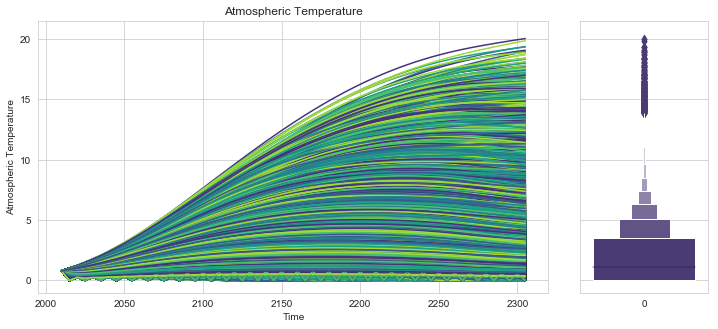

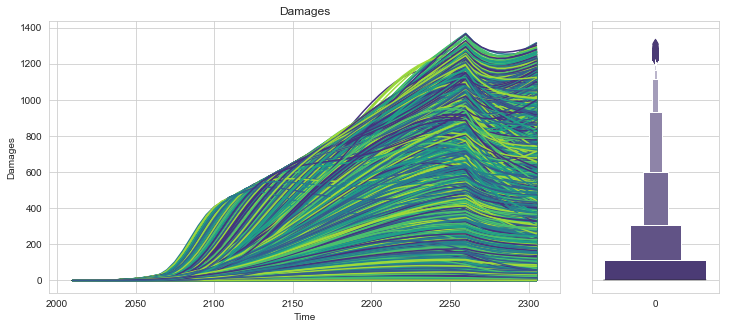

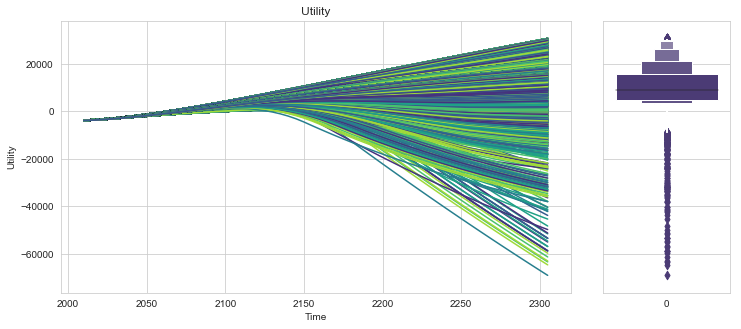

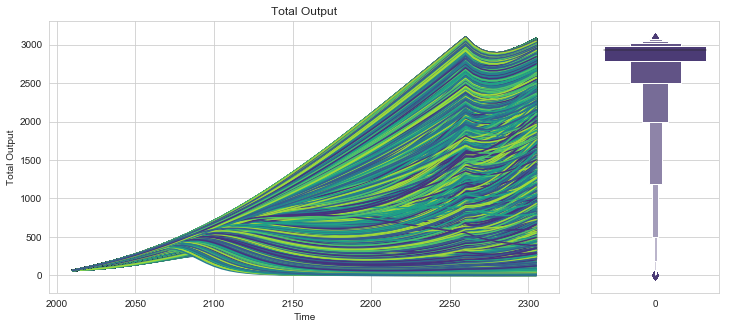

In [7]:
from ema_workbench.analysis import plotting, plotting_util

sns.set_style("whitegrid")

for outcome in outcomes.keys():
    fig,axes=plotting.lines(experiments, outcomes, outcomes_to_show=outcome, 
                            density=plotting_util.Density.BOXENPLOT)
    fig.set_size_inches(12, 5)
    fig.savefig('Time_Series_Plot_V4_' + str(outcome) + '_scen' + str(n_scenarios) 
                + '_pol' + str(n_policies) + '.png')
plt.show()